In [1]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import datetime
import locale
from locale import atof

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
!ls

TOP500_202206.xlsx Table.html         Untitled.ipynb


# Performance prediction

In [3]:
with open('Table.html', 'r') as fio:
    html = fio.read()

In [4]:
locale.setlocale(locale.LC_NUMERIC, '')

dt_format = '%b %d, %Y'

data = []

table_body = bs(html).find('tbody')

rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) # Get rid of empty values
    
df = pd.DataFrame(data, columns=['date', 'sum', 'top1', 'top500'])

df['date'] = pd.to_datetime(df['date'].apply(lambda x: datetime.datetime.strptime(x, dt_format).date()))
for col in ['sum', 'top1', 'top500']:
    df[col] = df[col].apply(atof)

df['ordinal'] = df['date'].apply(lambda x: x.toordinal())

df.head()

,date,sum,top1,top500,ordinal
0,1993-06-01,1128.57,59.7,0.42,727715
1,1993-11-01,1493.35,124.0,0.47,727868
2,1994-06-01,2317.01,143.4,0.84,728080
3,1994-11-01,2732.24,170.0,1.16,728233
4,1995-06-01,3927.00,170.0,1.96,728445


In [5]:
y = np.log(df['top1'].__array__().reshape(-1, 1))
X = df['ordinal'].__array__().reshape(-1, 1)

reg = LinearRegression().fit(X,y)

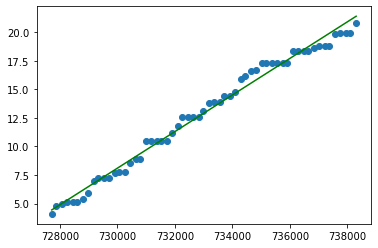

In [6]:
plt.scatter(X, y)
plt.plot(X, X * reg.coef_ + reg.intercept_, color='g')

In [7]:
ord_pred = datetime.date(2025, 1, 1).toordinal()
y_pred = np.array([ord_pred]).reshape(-1, 1)
print(f'Top1 at 2025-01-01 in RGflop/s = {np.exp(reg.predict(y_pred))[0][0]}')

Top1 at 2025-01-01 in RGflop/s = 8885298802.352827


# Share of electricity consumed

In [24]:
total_produced = 908598.4 * 1e3
#https://www.iea.org/data-and-statistics/data-tools/monthly-electricity-statistics

df_top500 = pd.read_excel('TOP500_202206.xlsx')
total_consumption = df_top500['Power (kW)'].sum()

print('Share:', "%.4f" % (total_consumption / total_produced * 100), '%')

Share: 0.0375 %
